# Assignment Kennis en Data

## Notebook made by


|Naam|Studentnummer|
|-|-|
|Yannick| secret |
|Rik| secret |
|Martijn| secret |
| | |

## Peerreview

* Vul onderstaande dict/tabel in en run de cel. Klopt het? Zijn jullie het er allemaal mee eens?
    * Verander `1,2,3,4` door jullie studentnummers
    * `1: {1:.2,2:.3,3:.3,4:.2}` betekent dat student 1 zijn punt zo over de 4 studenten verdeelt
    * Let op, per student moeten de punten optellen tot 1!
    * De gegeven punten staan in de tabel op de rijen, de ontvangen punten in de kolommen.
    * met `cijfer_per_student` kan je bepalen welk cijfer ieder krijgt bij een gegeven groepscijfer.

## Toelichting

* De meeste opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#RDF-plus-RDFS-conversion" data-toc-modified-id="RDF-plus-RDFS-conversion-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>RDF plus RDFS conversion</a></span><ul class="toc-item"><li><span><a href="#Vereisten" data-toc-modified-id="Vereisten-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Vereisten</a></span></li><li><span><a href="#Grading" data-toc-modified-id="Grading-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Grading</a></span></li></ul></li></ul></div>

# RDF plus RDFS conversion

* We will transform our family and LHBTI++ knowledge base into an RDF database and query it using SPARQL.
* The idea is that **you create this notebook as a tutorial on working with `rdflib`**.
* You will find many on the web, so search, watch and use the best what you can find to make a fun and top tutorial.

## Vereisten

1. `networkx2RDF(G)` takes any digraph G with additional node attributes and transform it to an RDF database.
2. Maak SPARQL queries voor al je gedefinieerde relaties. 
    * Check dat de antwoorden identiek zijn.
3. Download een andere triple store en maak daar juist een networkx graaf van (dat kan met rdflib), en bereken wat netwerk maten daarop.

## Grading

* Deze opdracht doen we met peergrading.
* Ieder groepje kijkt alle anderen en zichzelf na en geeft ieder groepje een deel van in totaal 100 te verdelen  punten.
* De eindscores transformeren we dan naar een cijfer tussen de 1 en 10. 






# RDF tutorial

## Introductie


![](https://rdflib.readthedocs.io/en/stable/_static/logo-rdflib.png)
                                                    
#### Wat is RDF?
RDF is een framework wat gebaseerd is op de data van websites en de content op deze sites. Met RDF wordt informatie van het internet met elkaar gelinkt. In deze tutorial gaan wij te werk met rdflib, dit is een python package om met RDF te werk te gaan. 








#### Library's inladen
Hier laden we de benodigde library's in om RDF te gebruiken




In [2]:
#!pip install rdflib
import rdflib
from rdflib import URIRef, BNode, Literal, Graph, Namespace, RDF
from rdflib.namespace import FOAF

import networkx as nx
from networkx import info, density
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt


### NetworkX familie relatie inladen

Hieronder maken we een networkX familie relatie aan die we later naar rdflib gaan overzetten


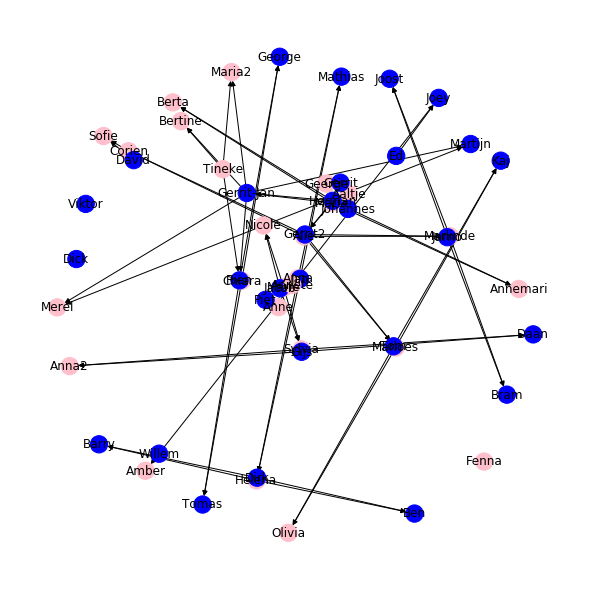

In [3]:

Familie_Graph = nx.DiGraph()
Familie_Graph.add_nodes_from(range(55))
namen = ['Anna', 'Jan', 'Anne', 'Piet', 'Aaltje', 'Johannes', 'Geertje', 'Gerrit', 'Helena', 'Dirk', 'Mathias', 'Marie', 'Jacob', 'Maria', 
                 'Herman', 'Ben', 'Barry', 'Ed', 'Joey', 'Willem', 'Amber', 'Annete', 'Sylvia', 'Gijs', 'Daan', 'Anna2', 'Nicole', 'Gerrit-Jan', 'Tineke',
                 'Alie', 'Gerrit2', 'Berta', 'Dick', 'Annemari', 'Martijn', 'Merel', 'Chiara', 'Rien', 'Tomas', 'George', 'Maria2', 'Viktor', 'Fenna', 'Bertine',
                 'Marlinde', 'Jarno', 'Joost', 'Bram', 'Marloes', 'Tom', 'Olivia', 'Kaj', 'Corien', 'David', 'Sofie']
F = [0,2,4,6,8,11,13,20,21,22,25,26,28,29,31,33,35,36,40,42,43,44,48,50,52,54]
Familie_Graph.add_edges_from([(0,8), (0,10), (0,11), (1,8), (1,10),(1,11),(2,12),(3,12),(4,13),(5,13),(6,14),(7,14),
                 (8,15),(8,16),(9,15),(9,16),(11,21),(11,22),(11,26),(12,21),(12,22),(12,26), 
                 (13,27),(13,30),(13,31),(13,33),(14,27),(14,30),(14,31),(14,33),(17,18),(19,20),(21,18),(21,20),
                 (22,24),(22,25),(23,24),(23,25),(26,34),(26,35),(27,34),(27,35),(27,37),(27,40),(27,43),
                 (28,37),(28,40),(28,43),(29,44),(29,48),(29,52),(30,44),(30,48),(30,52),
                 (36,38),(36,39),(37,38),(37,39),(44,46),(44,47),(45,46),(45,47),(48,50),(48,51),(49,50),(49,51),
                 (52,54),(53,54)])

kleuren= []
for node in Familie_Graph.nodes:
    if node in F:
        kleuren.append('pink')
        Familie_Graph.nodes[node]['geslacht'] = 'F'
    else:
        kleuren.append('blue')
        Familie_Graph.nodes[node]['geslacht'] = 'M'
    Familie_Graph = nx.relabel_nodes(Familie_Graph, {node: namen[node]})

plt.figure(3,figsize=(8,8)) 
# Zonder installatie van pygraphviz
nx.draw(Familie_Graph, node_color=kleuren, with_labels=True)



# Deel 1: NetworkX naar RDF
## Hoe werkt het?
De RDF interface waar we te werk mee gaan is een graph, dit is aan te maken via de functie 'Graph()'.
Deze graph bestaat uit sets van triples. Een triple bestaat uit 3 onderdelen: een subject, een predicate en een object. Deze staan samen in een tuple in de graph. Om een triple toe te voegen gebruik je de operator '.add()'.

In RDF hebben alle objects, predicates en subject een URI. Een URI is een unieke code die alleen refereert naar één object of naar één predicate of naar één subject. Je zou een URI kunnen vergelijken met de primary key uit een database. In de functie hieronder wordt gebruik gemaakt van namespaces om gemakkelijke en overzichtelijke URI's aan te maken. Een namespace zorgt er namelijk voor dat het eerste gedeelte van de URI altijd hetzelfde is. Hierdoor is het mogelijk om de URI's voor een groot gedeelte op elkaar te laten lijken.

Deze functie hieronder geeft weer hoe er vanuit een networkx graph een rdf graph wordt gemaakt.

In [4]:
def networkx2RDF(g_nx):
    
    # Graph is hier een RDF graph
    g_rdf = rdflib.Graph()
    
    # de namespaces die we gebruiken voor de attributes en edges
    
    ns1 = Namespace("http://example.org/node/")
    g_rdf.bind("node", ns1)
    ns2 = Namespace("http://example.org/data/")
    g_rdf.bind("data", ns2)
    ns3 = Namespace("http://example.org/attribute/")
    g_rdf.bind("attribute", ns3)
    
    # voeg attributes toe
    for node in g_nx.nodes(data=True):
        uri1 = URIRef(node[0])
        for attribute in node[1]:
            uri2 = URIRef(attribute)
            uri3 = URIRef(node[1][attribute])
            g_rdf.add((ns1[uri1], ns2[uri2], ns3[uri3]))
    
    # voeg edges toe
    for edge in g_nx.edges():
        node1 = URIRef(edge[0])
        node2 = URIRef(edge[1])
        
        g_rdf.add((ns1[node1], ns2.edge_to_node, ns1[node2]))  
    
    return g_rdf

print(networkx2RDF(Familie_Graph).serialize(format="turtle").decode("utf-8"))

@prefix attribute: <http://example.org/attribute/> .
@prefix data: <http://example.org/data/> .
@prefix node: <http://example.org/node/> .

node:Aaltje data:edge_to_node node:Maria ;
    data:geslacht attribute:F .

node:Alie data:edge_to_node node:Corien,
        node:Marlinde,
        node:Marloes ;
    data:geslacht attribute:F .

node:Anna data:edge_to_node node:Helena,
        node:Marie,
        node:Mathias ;
    data:geslacht attribute:F .

node:Anne data:edge_to_node node:Jacob ;
    data:geslacht attribute:F .

node:Chiara data:edge_to_node node:George,
        node:Tomas ;
    data:geslacht attribute:F .

node:David data:edge_to_node node:Sofie ;
    data:geslacht attribute:M .

node:Dick data:geslacht attribute:M .

node:Dirk data:edge_to_node node:Barry,
        node:Ben ;
    data:geslacht attribute:M .

node:Ed data:edge_to_node node:Joey ;
    data:geslacht attribute:M .

node:Fenna data:geslacht attribute:F .

node:Geertje data:edge_to_node node:Herman ;
    data:gesla

# Deel 2: Query's

RDF geeft ons de mogelijkheid om sparql query's uit te voeren. Een sparql query bestaat altijd uit drie onderdelen: een object, een predicate en een subject. Aan de hand van het hiervoor gemaakte familiemodel in RDF, gaan we kijken naar een aantal verschillende familierelaties door middel van sparql query's

In [5]:
def laatzien(output):
     return type(output), len(output), list(output)

In [6]:
# vaders in het familiemodel:
vader = networkx2RDF(Familie_Graph).query("""SELECT DISTINCT ?vader
                                    WHERE {?vader <http://example.org/data/edge_to_node> ?kind .
                                    ?vader <http://example.org/data/geslacht> <http://example.org/attribute/M> }""")

laatzien(vader)

(rdflib.plugins.sparql.processor.SPARQLResult,
 16,
 [(rdflib.term.URIRef('http://example.org/node/Rien')),
  (rdflib.term.URIRef('http://example.org/node/Gerrit2')),
  (rdflib.term.URIRef('http://example.org/node/Herman')),
  (rdflib.term.URIRef('http://example.org/node/David')),
  (rdflib.term.URIRef('http://example.org/node/Piet')),
  (rdflib.term.URIRef('http://example.org/node/Ed')),
  (rdflib.term.URIRef('http://example.org/node/Gerrit-Jan')),
  (rdflib.term.URIRef('http://example.org/node/Dirk')),
  (rdflib.term.URIRef('http://example.org/node/Jan')),
  (rdflib.term.URIRef('http://example.org/node/Jarno')),
  (rdflib.term.URIRef('http://example.org/node/Johannes')),
  (rdflib.term.URIRef('http://example.org/node/Gerrit')),
  (rdflib.term.URIRef('http://example.org/node/Gijs')),
  (rdflib.term.URIRef('http://example.org/node/Willem')),
  (rdflib.term.URIRef('http://example.org/node/Tom')),
  (rdflib.term.URIRef('http://example.org/node/Jacob'))])

In [7]:
# opa's in het familiemodel:
opa = networkx2RDF(Familie_Graph).query("""SELECT DISTINCT ?opa
                                    WHERE {?opa <http://example.org/data/edge_to_node> ?kind .
                                    ?kind <http://example.org/data/edge_to_node> ?kleinkind .
                                    ?opa <http://example.org/data/geslacht> <http://example.org/attribute/M> }""")

laatzien(opa)

(rdflib.plugins.sparql.processor.SPARQLResult,
 8,
 [(rdflib.term.URIRef('http://example.org/node/Herman')),
  (rdflib.term.URIRef('http://example.org/node/Jan')),
  (rdflib.term.URIRef('http://example.org/node/Piet')),
  (rdflib.term.URIRef('http://example.org/node/Johannes')),
  (rdflib.term.URIRef('http://example.org/node/Gerrit')),
  (rdflib.term.URIRef('http://example.org/node/Gerrit2')),
  (rdflib.term.URIRef('http://example.org/node/Gerrit-Jan')),
  (rdflib.term.URIRef('http://example.org/node/Jacob'))])

In [8]:
# broers in het familiemodel
broer = networkx2RDF(Familie_Graph).query("""SELECT DISTINCT ?kind1
                                    WHERE {?ouder <http://example.org/data/edge_to_node> ?kind1 .
                                    ?ouder <http://example.org/data/edge_to_node> ?kind2 .
                                    ?kind1 <http://example.org/data/geslacht> <http://example.org/attribute/M> 
                                    FILTER(?kind1 != ?kind2)}""")

laatzien(broer)

(rdflib.plugins.sparql.processor.SPARQLResult,
 14,
 [(rdflib.term.URIRef('http://example.org/node/Daan')),
  (rdflib.term.URIRef('http://example.org/node/Martijn')),
  (rdflib.term.URIRef('http://example.org/node/Gerrit-Jan')),
  (rdflib.term.URIRef('http://example.org/node/Ben')),
  (rdflib.term.URIRef('http://example.org/node/Mathias')),
  (rdflib.term.URIRef('http://example.org/node/Bram')),
  (rdflib.term.URIRef('http://example.org/node/Tomas')),
  (rdflib.term.URIRef('http://example.org/node/Rien')),
  (rdflib.term.URIRef('http://example.org/node/Gerrit2')),
  (rdflib.term.URIRef('http://example.org/node/George')),
  (rdflib.term.URIRef('http://example.org/node/Joost')),
  (rdflib.term.URIRef('http://example.org/node/Joey')),
  (rdflib.term.URIRef('http://example.org/node/Kaj')),
  (rdflib.term.URIRef('http://example.org/node/Barry'))])

In [9]:
# ooms in het familiemodel
oom = networkx2RDF(Familie_Graph).query("""SELECT DISTINCT ?kind1
                                    WHERE {?ouder <http://example.org/data/edge_to_node> ?kind1 .
                                    ?ouder <http://example.org/data/edge_to_node> ?kind2 .
                                    ?kind2 <http://example.org/data/edge_to_node> ?kindvanbroerofzus .
                                    ?kind1 <http://example.org/data/geslacht> <http://example.org/attribute/M> 
                                    FILTER(?kind1 != ?kind2)}""")

laatzien(oom)

(rdflib.plugins.sparql.processor.SPARQLResult,
 4,
 [(rdflib.term.URIRef('http://example.org/node/Mathias')),
  (rdflib.term.URIRef('http://example.org/node/Martijn')),
  (rdflib.term.URIRef('http://example.org/node/Gerrit-Jan')),
  (rdflib.term.URIRef('http://example.org/node/Gerrit2'))])

# Zelf aan de slag!

Ga nu zelf aan de slag en maak de volgende query's, succes!

### Vraag 1: Maak een query dat alle moeders teruggeeft

In [10]:
# Jouw code hier
moeder=None

# met deze functie hieronder kan je het resultaat van de query zien
# laatzien(moeder) 

## Verwachte output vraag 1:

(rdflib.plugins.sparql.processor.SPARQLResult,
 16,

 [(rdflib.term.URIRef('http://example.org/node/Anne')),
  (rdflib.term.URIRef('http://example.org/node/Chiara')),
  (rdflib.term.URIRef('http://example.org/node/Aaltje')),
  (rdflib.term.URIRef('http://example.org/node/Annete')),
  (rdflib.term.URIRef('http://example.org/node/Tineke')),
  (rdflib.term.URIRef('http://example.org/node/Anna')),
  (rdflib.term.URIRef('http://example.org/node/Helena')),
  (rdflib.term.URIRef('http://example.org/node/Marie')),
  (rdflib.term.URIRef('http://example.org/node/Sylvia')),
  (rdflib.term.URIRef('http://example.org/node/Corien')),
  (rdflib.term.URIRef('http://example.org/node/Alie')),
  (rdflib.term.URIRef('http://example.org/node/Marlinde')),
  (rdflib.term.URIRef('http://example.org/node/Marloes')),
  (rdflib.term.URIRef('http://example.org/node/Maria')),
  (rdflib.term.URIRef('http://example.org/node/Geertje')),
  (rdflib.term.URIRef('http://example.org/node/Nicole'))

## Vraag 2: Maak een query dat alle tantes teruggeeft

In [11]:
# Jouw code hier
tante=None

# met deze functie hieronder kan je het resultaat van de query zien
# laatzien(tante)

## Verwachte output vraag 2:

(rdflib.plugins.sparql.processor.SPARQLResult,
 13,

 
 [(rdflib.term.URIRef('http://example.org/node/Helena')),
  (rdflib.term.URIRef('http://example.org/node/Maria2')),
  (rdflib.term.URIRef('http://example.org/node/Annemari')),
  (rdflib.term.URIRef('http://example.org/node/Merel')),
  (rdflib.term.URIRef('http://example.org/node/Marloes')),
  (rdflib.term.URIRef('http://example.org/node/Nicole')),
  (rdflib.term.URIRef('http://example.org/node/Sylvia')),
  (rdflib.term.URIRef('http://example.org/node/Bertine')),
  (rdflib.term.URIRef('http://example.org/node/Corien')),
  (rdflib.term.URIRef('http://example.org/node/Berta')),
  (rdflib.term.URIRef('http://example.org/node/Marie')),
  (rdflib.term.URIRef('http://example.org/node/Marlinde')),
  (rdflib.term.URIRef('http://example.org/node/Annete'))])

### Vraag 3: Maak een query dat alle overgrootvaders teruggeeft

In [12]:
# Jouw code hier
overgrootvaders=None

# met deze functie hieronder kan je het resultaat van de query zien
# laatzien(overgrootvaders)

## Verwachte output vraag 3:

(rdflib.plugins.sparql.processor.SPARQLResult,
 5,
 
 [(rdflib.term.URIRef('http://example.org/node/Gerrit')),
  (rdflib.term.URIRef('http://example.org/node/Johannes')),
  (rdflib.term.URIRef('http://example.org/node/Piet')),
  (rdflib.term.URIRef('http://example.org/node/Jan')),
  (rdflib.term.URIRef('http://example.org/node/Herman'))])

# Deel 3: RDF naar NetworkX

In Deel 1 van dit Jupyter Notebook heb je al kunnen zien dat we vanuit een networkx graph een RDF model hebben gemaakt. Dit kan natuurlijk ook de andere kant op, dus vanuit RDF een networkx graph maken. Uiteindelijk zou de bedoeling moeten zijn dat een networkx graph die door de eerste functie (networkx2RDF) gaat, en vervolgens door de tweede functie (RDF2networkx) gaat, nog steeds precies gelijk moet zijn aan de originele networkx graph. In dat geval zouden deze twee dus isomorph aan elkaar moeten zijn. 

In [13]:
def RDF2networkx(RDF, URI_attribute_list):
    
    #Er wordt een networkx graph aangemaakt
    G = nx.DiGraph()
    
    #voor iedere triple wordt de object als node aangemaakt
    for triple in RDF:
        G.add_node(triple[0])

        #voor ieder subject dat geen attribute is wordt een node aangemaakt en vervolgens ook een edge 
        if triple[1] not in URI_attribute_list:
            G.add_node(triple[2])
            G.add_edge(triple[0], triple[2])
    
    #voor ieder object dat een attribute heeft wordt een attribute aangemaakt
    for triple in RDF:
        if triple[1] in URI_attribute_list:
            G.nodes[triple[0]][triple[1]] = triple[2]
        
    return G

Nu gaan we met de is_isomorphic functie testen of dit ook daadwerkelijk het geval is

Het werkt! Een graaf die van Networkx naar RDF gaat en weer terug is isomorph aan de originele graaf, dus beide functies werken!


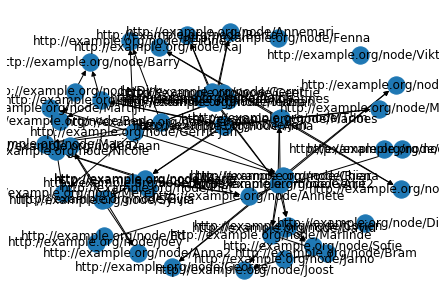

In [14]:
nx.draw(RDF2networkx(networkx2RDF(Familie_Graph), [rdflib.term.URIRef('http://example.org/data/geslacht')]), with_labels=True)

#testen of de functies werken door te kijken of een originele networkx graaf isomorph is aan dezelfde graaf die naar RDF is gegaan en terug
if nx.is_isomorphic(RDF2networkx(networkx2RDF(Familie_Graph), rdflib.term.URIRef('http://example.org/data/geslacht')), Familie_Graph):
    print('Het werkt! Een graaf die van Networkx naar RDF gaat en weer terug is isomorph aan de originele graaf, dus beide functies werken!')

Tot slot gaan we nog een triple store van het internet downloaden om er een networkx graaf van te maken.

Om dat te doen moeten we voor de RDF triple store weten welke triples een attribute zouden zijn in Networkx. Dat doen we met de volgende functie.

In [15]:
def Make_URI_Attribute_List(RDF):
    
    URI_Attribute_Set = set()
    
    #sla alle URI's op die als datatype Literal zijn
    for triple in RDF:
        if type(triple[2]) == rdflib.Literal:
            URI_Attribute_Set.add(triple[1])
    
    return list(URI_Attribute_Set)

Vervolgens kunnen we een gedownloade triple store (in dit geval Mark Rutte) omzetten naar Networkx.

Name: 
Type: DiGraph
Number of nodes: 55
Number of edges: 68
Average in degree:   1.2364
Average out degree:   1.2364
Density is
0.022895622895622896


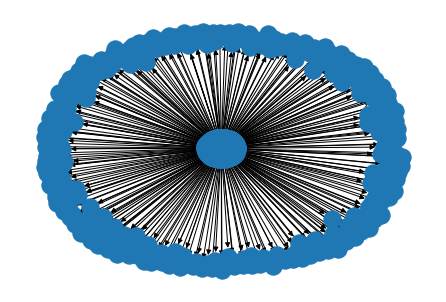

In [18]:
Mark_Rutte_Graph = rdflib.Graph()

Mark_Rutte_Graph.parse('https://dbpedia.org/resource/Mark_Rutte')

Mark_Rutte_Graph_nx = RDF2networkx(Mark_Rutte_Graph, Make_URI_Attribute_List(Mark_Rutte_Graph))

nx.draw(Mark_Rutte_Graph_nx)

# een aantal interessante netwerkmaten
print(info(Familie_Graph))
print('Density is')
print(density(Familie_Graph))

En bij deze zijn we bij het einde gekomen van onze tutorial. Hopelijk vond je het leuk en interessant!
